In [1]:
# Enhanced visualization examples for ERA5 data (now with integrated geographic context)
from piscis import (plot_variable, plot_time_series, plot_multiple_variables,
                    plot_climatology, plot_statistics_summary, compare_datasets,
                    print_variables_summary, get_variable_names, show_metadata)

In [ ]:
file_path = './data/raw/reanalysis-era5-single-levels_u_v_component_wind_10m_3hourly_-3.01_-84.62_-19.51_-67.62_0.25deg.nc'

show_metadata(file_path)

print("\n" + "="*60)

# Get simple list of available variables
available_vars = print_variables_summary(file_path)

===== Global Attributes =====
{'GRIB_centre': 'ecmf', 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts', 'GRIB_subCentre': np.int64(0), 'Conventions': 'CF-1.7', 'institution': 'European Centre for Medium-Range Weather Forecasts', 'history': '2025-12-15T17:05 GRIB to CDM+CF via cfgrib-0.9.15.1/ecCodes-2.42.0 with {"source": "tmp7f86n10m/data.grib", "filter_by_keys": {"stream": ["oper"], "stepType": ["instant"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}

===== Variables =====

Variable: u10
  Dimensions: ('valid_time', 'latitude', 'longitude')
  Shape: (24, 67, 69)
  Attributes:
    GRIB_paramId: 165
    GRIB_dataType: an
    GRIB_numberOfPoints: 4623
    GRIB_typeOfLevel: surface
    GRIB_stepUnits: 1
    GRIB_stepType: instant
    GRIB_gridType: regular_ll
    GRIB_uvRelativeToGrid: 0
    GRIB_NV: 0
    GRIB_Nx: 69
    GRIB_Ny: 67
    GRIB_cfName: unknown
    GRIB_cfVarName: u10
    GRIB_gridDefinitionDescription: Latitude/Longitude Gr

In [3]:
# Select the first available variable (or specify your preferred one)
if available_vars:
    variable_name = available_vars[0]  # Use first variable
    print(f"Selected variable: {variable_name}")
else:
    variable_name = 'u10'  # fallback
    print(f"No variables found, using fallback: {variable_name}")

Selected variable: u10


Loaded NetCDF file at ./data/raw/reanalysis-era5-single-levels_u_v_component_wind_10m_3hourly_-3.01_-84.62_-19.51_-67.62_0.25deg.nc


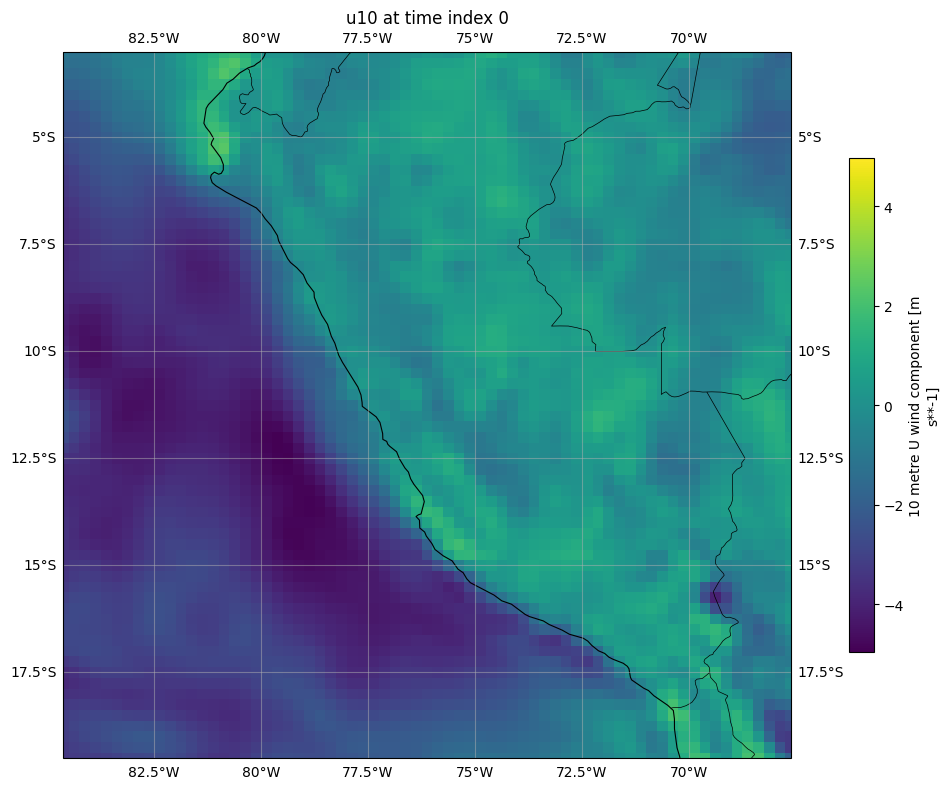

In [ ]:
plot_variable(file_path, variable_name, time_index=0)

In [5]:
# Alternative: Interactive variable selection
# Uncomment the following lines to manually select a variable:

# print("Available variables:")
# for i, var in enumerate(available_vars):
#     print(f"{i}: {var}")
# 
# # To select a specific variable by index:
# # variable_index = 1  # Change this index
# # variable_name = available_vars[variable_index]
# # print(f"Selected: {variable_name}")

In [6]:
# Interactive variable selection (uncomment to use)
# from piscis import select_variable_interactive
# variable_name = select_variable_interactive(file_path)

Loaded NetCDF file at ./data/raw/reanalysis-era5-single-levels_u_v_component_wind_10m_3hourly_-3.01_-84.62_-19.51_-67.62_0.25deg.nc


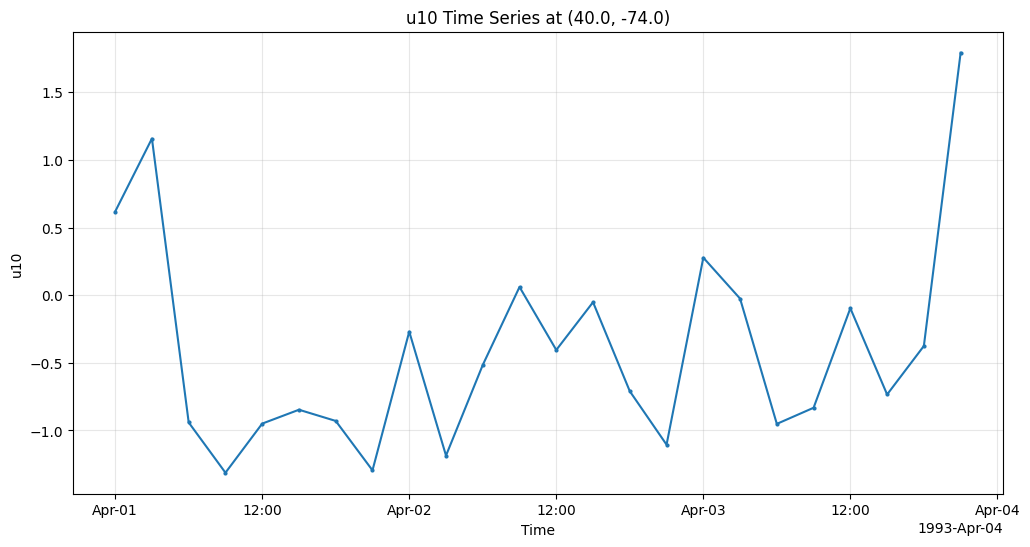

In [7]:
# 2. Time series at specific location
lat, lon = 40.0, -74.0  # New York coordinates
plot_time_series(file_path, variable_name, lat=lat, lon=lon)

Loaded NetCDF file at ./data/raw/reanalysis-era5-single-levels_u_v_component_wind_10m_3hourly_-3.01_-84.62_-19.51_-67.62_0.25deg.nc


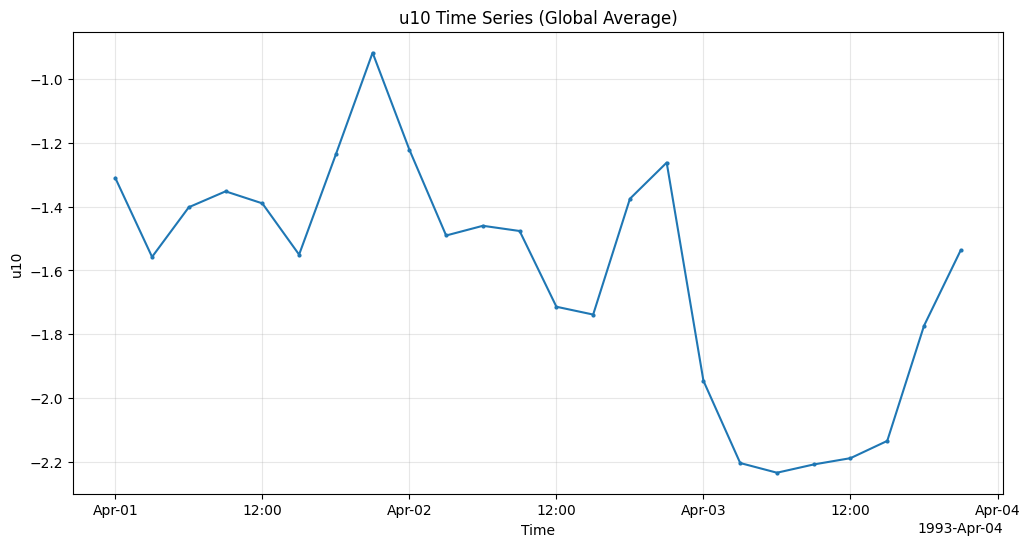

In [8]:
# 3. Global average time series
plot_time_series(file_path, variable_name)

In [9]:
# 4. Seasonal climatology
plot_climatology(file_path, variable_name, method='monthly')

Loaded NetCDF file at ./data/raw/reanalysis-era5-single-levels_u_v_component_wind_10m_3hourly_-3.01_-84.62_-19.51_-67.62_0.25deg.nc
Error plotting climatology: No numeric data to plot.


<Figure size 1000x600 with 0 Axes>

Loaded NetCDF file at ./data/raw/reanalysis-era5-single-levels_u_v_component_wind_10m_3hourly_-3.01_-84.62_-19.51_-67.62_0.25deg.nc


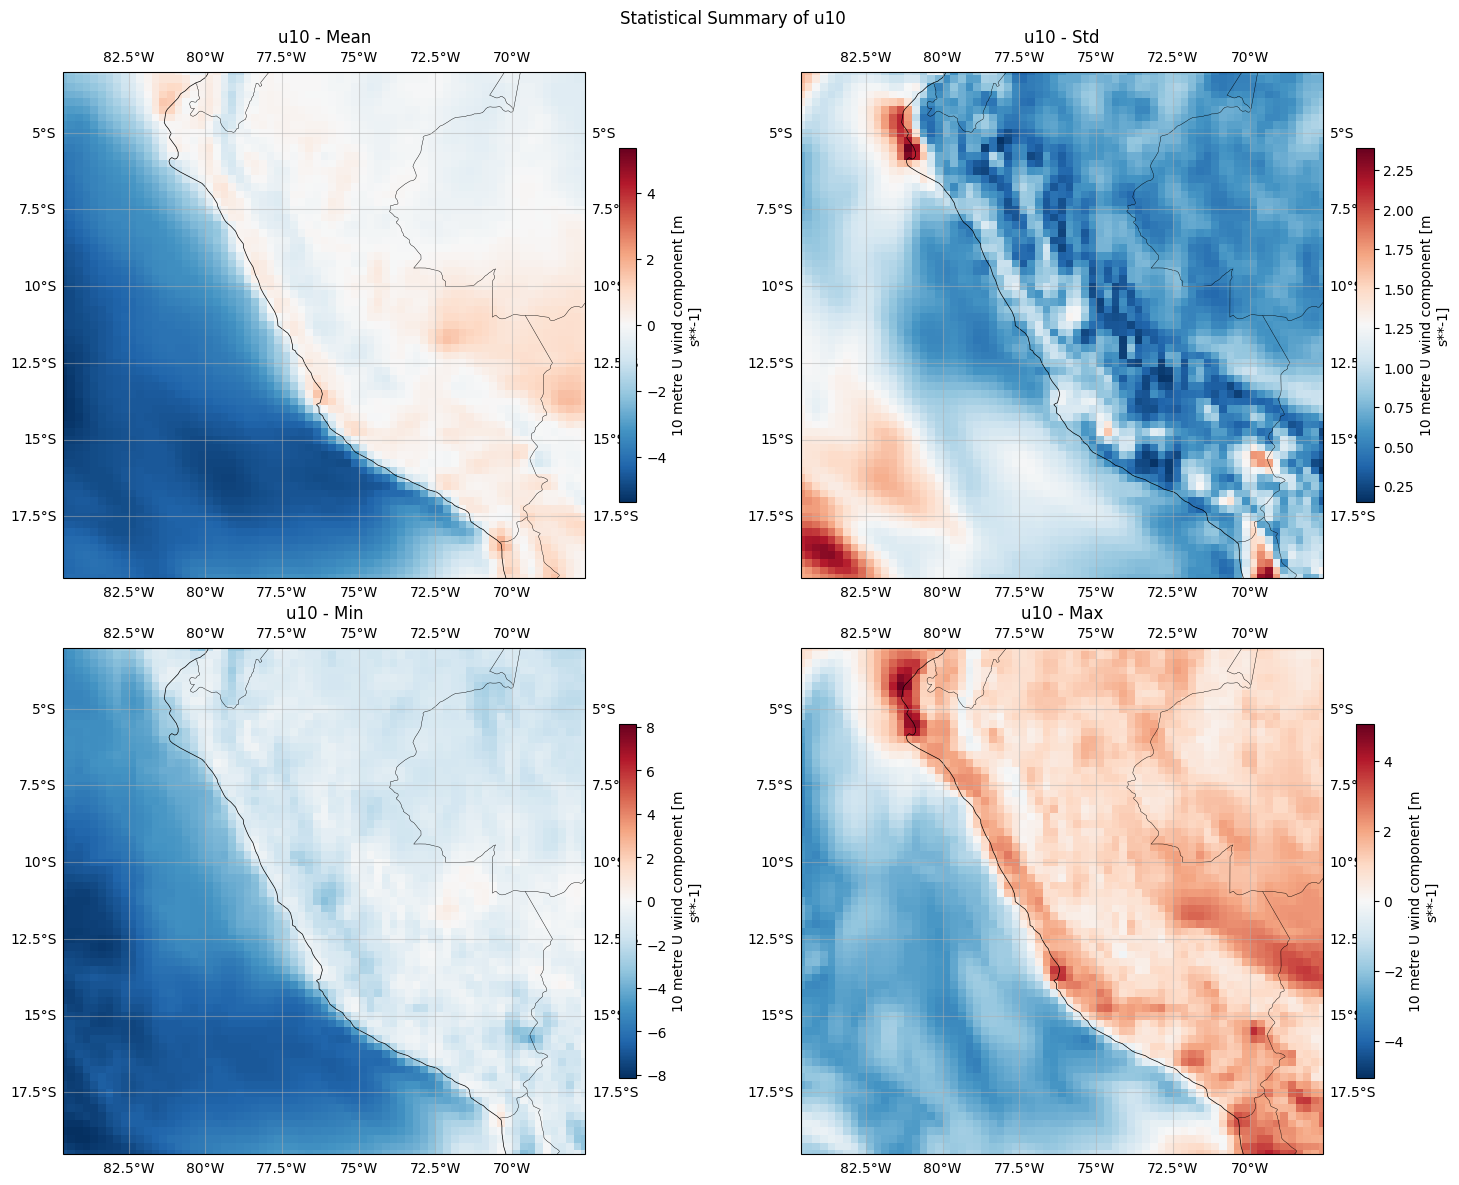

In [10]:
# 5. Statistical summary over time
plot_statistics_summary(file_path, variable_name)

Loaded NetCDF file at ./data/raw/reanalysis-era5-single-levels_u_v_component_wind_10m_3hourly_-3.01_-84.62_-19.51_-67.62_0.25deg.nc
All available variables: ['u10', 'v10']
Plotting variables with geographic context: ['u10', 'v10']
Loaded NetCDF file at ./data/raw/reanalysis-era5-single-levels_u_v_component_wind_10m_3hourly_-3.01_-84.62_-19.51_-67.62_0.25deg.nc


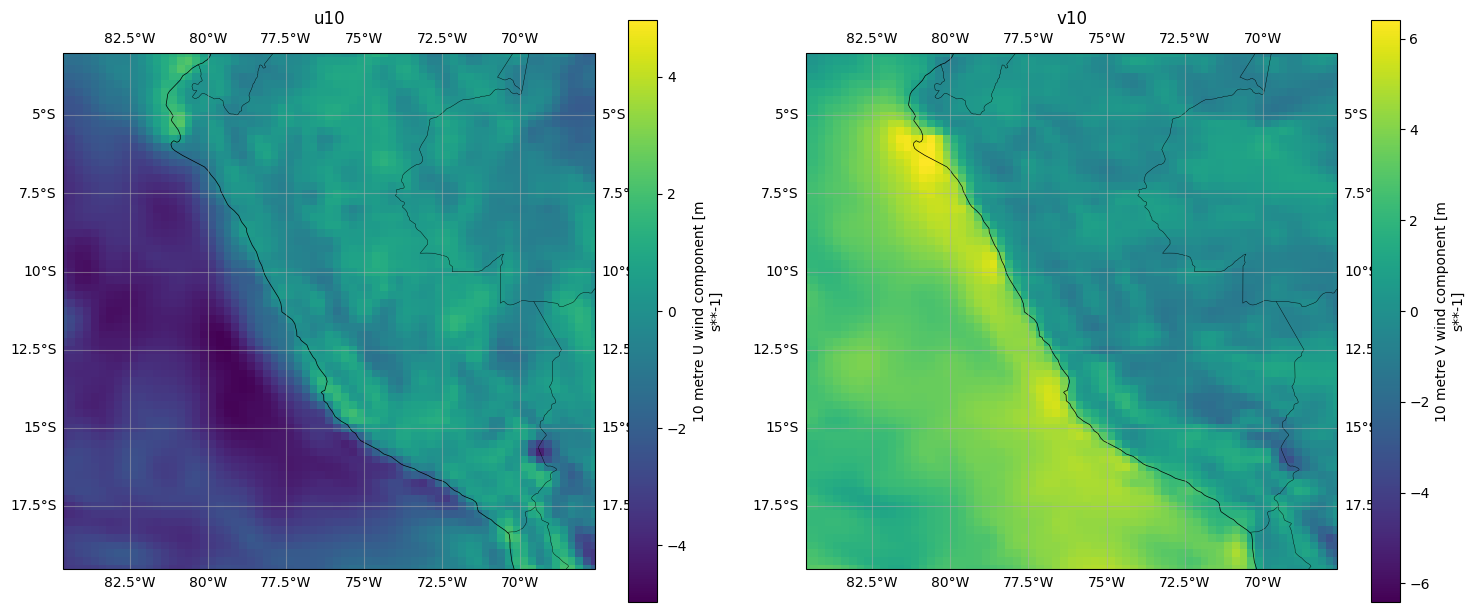

In [11]:
# 6. Plot multiple variables with integrated geographic context
# Get all available variables
all_vars = get_variable_names(file_path)
print(f"All available variables: {all_vars}")

# Plot multiple variables if there are more than one
if len(all_vars) > 1:
    # Take up to 4 variables for plotting
    vars_to_plot = all_vars[:4]
    print(f"Plotting variables with geographic context: {vars_to_plot}")
    plot_multiple_variables(file_path, vars_to_plot, time_index=0)
else:
    print("Only one variable available, use individual plots instead.")

In [12]:
# If you have multiple variables, uncomment and modify:
# variables_to_plot = ['t2m', 'u10', 'v10']  # example variables
# plot_multiple_variables(file_path, variables_to_plot, time_index=0)

In [13]:
# 7. Compare multiple datasets (if you have multiple files)
# file_paths = ['./data/raw/era5_2m_temperature.nc', './data/raw/another_dataset.nc']
# labels = ['ERA5', 'Other Dataset']
# compare_datasets(file_paths, variable_name, labels=labels)

## Available Visualization Functions

The `piscis.visualizer` module includes several powerful functions:

- **`plot_variable()`**: Spatial plot at specific time with automatic geographic context
- **`plot_time_series()`**: Time series at location or global average
- **`plot_climatology()`**: Seasonal cycles (monthly/seasonal)
- **`plot_statistics_summary()`**: Statistical overview (mean, std, min, max)
- **`plot_multiple_variables()`**: Multiple variables in subplots with geographic context
- **`compare_datasets()`**: Compare same variable across datasets
- **`plot_variable_animation()`**: Create animations over time

All functions automatically include coastlines, borders, and proper projections when cartopy is available.